In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pickle

# Load the numpy arrays
X_train_preprocessed = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/X_train_preprocessed.npy')

X_test_preprocessed = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/X_test_preprocessed.npy')

X_val_preprocessed = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/X_val_preprocessed.npy')

y_train = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/y_train.npy')

y_test = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/y_test.npy')

y_val = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/y_val.npy')

In [2]:
# check dtypes
X_train_preprocessed.dtype

dtype('float32')

In [3]:
# pretrained model - MobileNetV2
# all should be numpy arrays or tensors to give to MobileNetV2
"""
tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,                 # Shape of input data (MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.) 
    alpha=1.0,                        # Width multiplier for controlling network width (default is 1.0)
    include_top=True,                 # Include fully connected top layers (default is True)
    weights='imagenet',               # Weight initialization ('imagenet' for pre-trained weights, None for random initialization)
    input_tensor=None,                # Optional input tensor (default is None)
    pooling=None,                     # Pooling type for the last layer ('avg', 'max', or None; default is None)
    classes=1000,                     # Number of output classes (default is 1000 for ImageNet)
    classifier_activation='softmax',   # Activation function for output layer (default is 'softmax')
    **kwargs                          # Additional keyword arguments
)
"""
# we dont have to set anything and keep its default values

MobileNetV2_model = tf.keras.applications.mobilenet_v2.MobileNetV2()

# Make all layers in the model non-trainable - freeze
for layer in MobileNetV2_model.layers:
    layer.trainable = False

In [4]:
MobileNetV2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [5]:
base_input = MobileNetV2_model.layers[0].input

base_output = MobileNetV2_model.layers[-3].output
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_output)
final_output = tf.keras.layers.Dense(1)(global_average_layer)

final_output = tf.keras.layers.Activation("sigmoid")(final_output)

In [6]:
drowsiness_detection_model = tf.keras.Model(
    inputs=base_input,
    outputs=final_output
)

In [7]:
drowsiness_detection_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [8]:
# Compile and train the model using X_train_preprocessed as input
drowsiness_detection_model.compile(optimizer='adam', 
                                   loss='binary_crossentropy', 
                                   metrics=['accuracy'])
drowsiness_detection_model.fit(X_train_preprocessed, 
                               y_train, 
                               epochs=5, 
                               batch_size=8, 
                               validation_data=(X_val_preprocessed, y_val))

Epoch 1/5
3715/3715 [==============================] - 1274s 342ms/step - loss: 0.1206 - accuracy: 0.9575 - val_loss: 0.0924 - val_accuracy: 0.9662
Epoch 2/5
3715/3715 [==============================] - 1337s 360ms/step - loss: 0.0829 - accuracy: 0.9709 - val_loss: 0.0790 - val_accuracy: 0.9716
Epoch 3/5
3715/3715 [==============================] - 1392s 375ms/step - loss: 0.0732 - accuracy: 0.9732 - val_loss: 0.0835 - val_accuracy: 0.9711
Epoch 4/5
3715/3715 [==============================] - 679s 183ms/step - loss: 0.0679 - accuracy: 0.9750 - val_loss: 0.0763 - val_accuracy: 0.9709
Epoch 5/5
3715/3715 [==============================] - 696s 187ms/step - loss: 0.0646 - accuracy: 0.9765 - val_loss: 0.0727 - val_accuracy: 0.9720


In [9]:
#  predict on test data
y_pred = drowsiness_detection_model.predict(X_test_preprocessed)

199/199 [==============================] - 77s 378ms/step


In [11]:
# check first 10 predictions
y_pred[:10]

array([[9.9999928e-01],
       [8.5934156e-01],
       [1.0224144e-04],
       [8.5132271e-03],
       [6.0090311e-02],
       [2.1316420e-02],
       [9.9980187e-01],
       [3.7540443e-04],
       [9.9508852e-01],
       [9.9939862e-03]], dtype=float32)

In [15]:
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred_binary.flatten() == y_test)
accuracy * 100

97.31469849246231

In [61]:
sample_image = cv2.imread("D:/JATHURSH/Jupyter_notebook_projects/DeepLearning/driving-man-2.jpg")

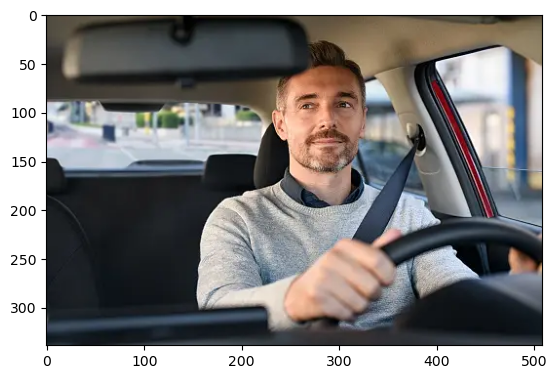

In [62]:
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))

In [63]:
"""
cv2.CascadeClassifier - a class provided by the OpenCV library (Open Source Computer Vision Library). 
This class is commonly used for object detection tasks, particularly for detecting faces and other objects
in images or video streams.

cv2.CascadeClassifier is used with Haar cascades or LBP (Local Binary Pattern) cascades, which are pre-trained 
classifiers that can be used to detect objects in images. These cascades are XML files that contain information 
about the features of the object being detected and how to identify it.

Using OpenCV Pre-trained Data: OpenCV usually comes with a package of pre-trained classifiers, including the one 
for face detection. You can often find these XML files in a directory named 'data' within your OpenCV installation
directory. The exact location may vary depending on how OpenCV was installed and your operating system.

Downloading from the OpenCV GitHub Repository: If you can't find the XML file in your OpenCV installation, 
you can download it from the official OpenCV GitHub repository.
"""
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the pre-trained Haar Cascade classifier for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [64]:
# converting a color image represented in the BGR (Blue, Green, Red) color space to a grayscale image
gray_scale_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

In [65]:
"""
detectMultiScale: This is a method of the CascadeClassifier class in OpenCV used for detecting objects (in this case, eyes) 
in an image.

gray_scale_image: This is the input image in grayscale on which you want to perform eye detection. 
Typically, the grayscale image is used because object detection is often more robust when performed on grayscale images.

1.3: This is the scale factor, which specifies how much the image size is reduced at each image scale. 
A smaller scale factor may result in a slower but more accurate detection, while a larger scale factor 
may result in faster but less accurate detection.

4: This is the minNeighbors parameter, which specifies the minimum number of neighbors (rectangles) that
an object candidate must have to retain it. Higher values will result in fewer detections but with higher quality.

(30, 30): This is the minSize parameter, which specifies the minimum object size. Objects smaller than this size will not be detected.
"""
eyes = eye_cascade.detectMultiScale(gray_scale_image, scaleFactor=1.1, minNeighbors=4)

In [66]:
# Draw rectangles around the detected eyes
"""
for (ex, ey, ew, eh) in eyes:
    # This is a for loop that iterates over the list of detected eyes.
    # Each detected eye is represented by a tuple of four values:
    # - ex (x-coordinate of the top-left corner of the eye bounding box)
    # - ey (y-coordinate of the top-left corner of the eye bounding box)
    # - ew (width of the eye bounding box)
    # - eh (height of the eye bounding box)
    # The loop unpacks these values for each detected eye.

    cv2.rectangle(sample_image, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)
    # This line of code draws a red (BGR color (0, 0, 255)) rectangle around the detected eye on the sample_image.
    # It uses the following arguments:
    # - sample_image: The image on which the rectangles will be drawn.
    # - (ex, ey): The coordinates of the top-left corner of the rectangle.
    # - (ex + ew, ey + eh): The coordinates of the bottom-right corner of the rectangle, calculated by adding the width and height to the top-left coordinates.
    # - (0, 255, 0): The color of the rectangle, specified as a tuple in BGR format. In this case, it's green.
    # - 2: The thickness of the rectangle's border.
"""
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(sample_image, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

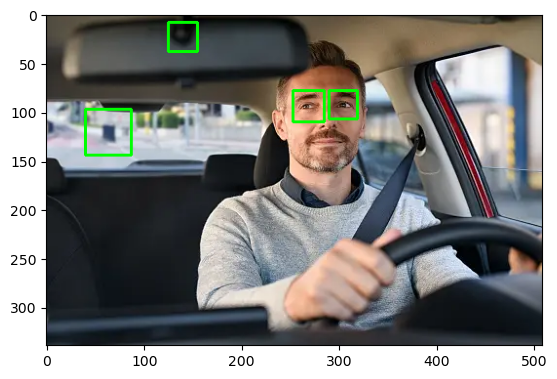

In [67]:
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))

In [73]:
# crop eye from sample image
# Perform eye detection
eyes = eye_cascade.detectMultiScale(gray_scale_image)

# Initialize a list to store cropped eyes
eyes_roi_list = []

# Crop and store detected eyes
for (x, y, w, h) in eyes:
    roi_color = sample_image[y:y+h, x:x+w]
    eyes_roi_list.append(roi_color)

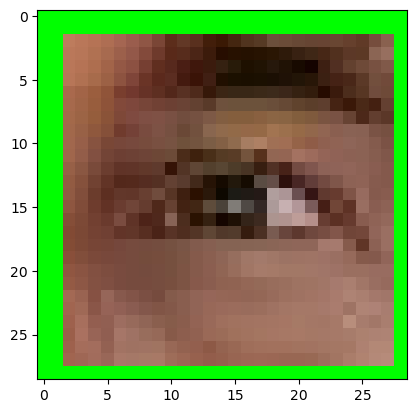

In [76]:
plt.imshow(cv2.cvtColor(eyes_roi_list[0], cv2.COLOR_BGR2RGB))

In [77]:
eyes_roi_list[0].shape

(29, 29, 3)

In [80]:
# convert to 224,224 
final_image = cv2.resize(eyes_roi_list[0], (224, 224))

# Adding the 4th dimension (batch dimension) for compatibility with deep learning models
final_image = np.expand_dims(final_image, axis=0)

# Normalize the image by scaling its pixel values to the range [0, 1]
final_image = final_image / 255.0

In [81]:
final_image.shape

(1, 224, 224, 3)

In [82]:
y_pred_of_final_image = drowsiness_detection_model.predict(final_image)

1/1 [==============================] - 2s 2s/step


In [83]:
y_pred_of_final_image

array([[0.07879247]], dtype=float32)

In [ ]:
# positive means open, negative means closed
# To improve the accuracy of eye detection and reduce false positives, it's a good idea to perform face detection before
# eye detection. By first detecting faces in the image, you can then focus the eye detection process on the regions of
# interest (ROIs) around the detected faces.

In [84]:
# Save the model architecture and weights
drowsiness_detection_model.save('drowsiness_detection_model_1.h5')

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
